# FieldMesh Examples

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import numpy as np

In [2]:
from pmd_beamphysics import FieldMesh, tools

In [3]:
?FieldMesh

In [4]:
FM = FieldMesh('../data/solenoid.h5')
FM

<FieldMesh with cylindrical geometry and (101, 1, 201) shape at 0x7f8428a9da60>

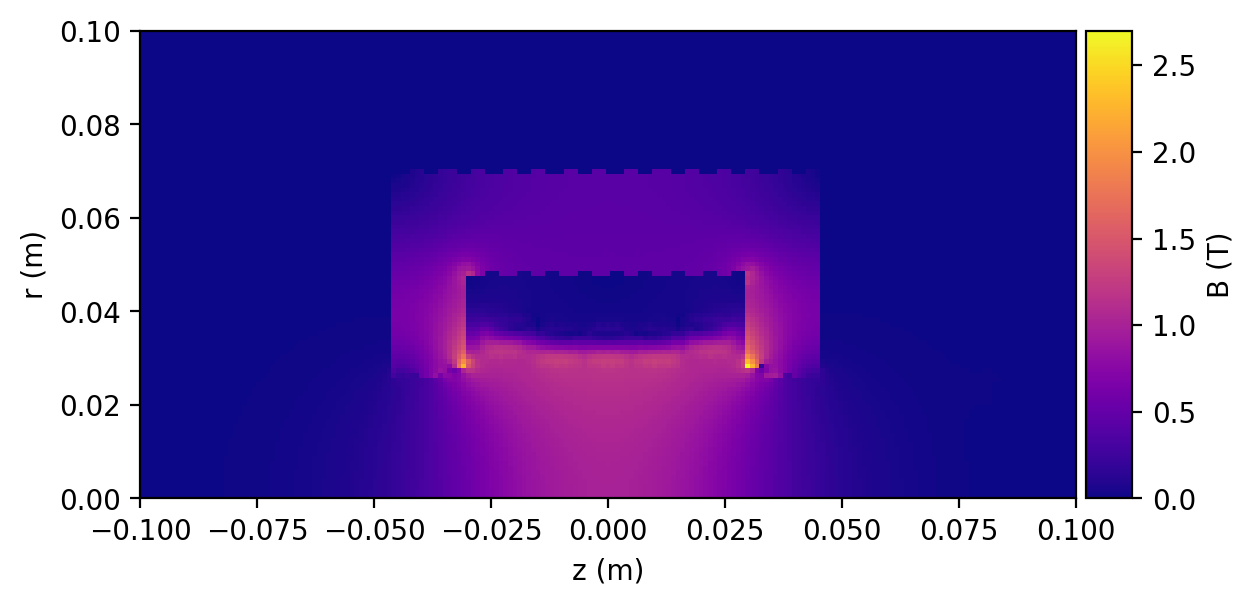

In [5]:
# Built-in plotting
FM.plot('B', aspect='equal')

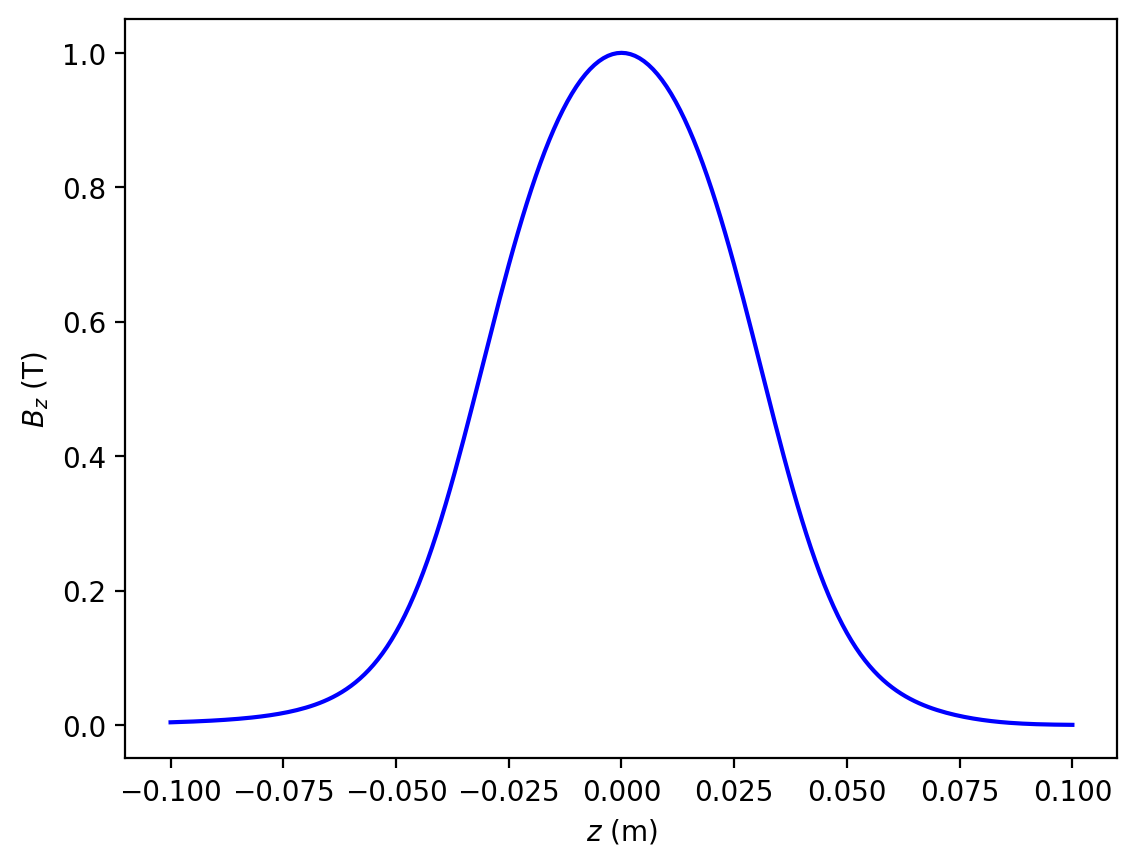

In [6]:
# On-axis field plotting
FM.plot_onaxis()

# Internal data

In [7]:
# Internal data: attributes and components
FM.attrs, FM.components.keys()

({'eleAnchorPt': 'beginning',
  'gridGeometry': 'cylindrical',
  'axisLabels': array(['r', 'theta', 'z'], dtype='<U5'),
  'gridLowerBound': array([0, 1, 0]),
  'gridOriginOffset': array([ 0. ,  0. , -0.1]),
  'gridSpacing': array([0.001, 0.   , 0.001]),
  'gridSize': array([101,   1, 201]),
  'harmonic': 0,
  'fundamentalFrequency': 0,
  'RFphase': 0,
  'fieldScale': 1.0},
 dict_keys(['magneticField/z', 'magneticField/r']))

# Properties

In [8]:
# Convenient access to these
FM.shape

(101, 1, 201)

In [9]:
FM.frequency

0

In [10]:
# Coordinate vectors: .r, .theta, .z
FM.r, FM.dr

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
        0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
        0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
        0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
        0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
        0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
        0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
        0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
        0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
        0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
        0.099, 0.1  ]),
 0.001)

In [11]:
# Grid info
FM.mins, FM.maxs, FM.deltas

(array([ 0. ,  0. , -0.1]),
 array([0.1, 0. , 0.1]),
 array([0.001, 0.   , 0.001]))

In [12]:
# Convenient logicals
FM.is_static, FM.is_pure_magnetic, FM.is_pure_magnetic,  FM.is_pure_electric

(True, True, True, False)

# Components

In [13]:
FM.components

{'magneticField/z': array([[[ 4.10454985e-03,  4.31040451e-03,  4.52986744e-03, ...,
           4.67468517e-04,  3.93505841e-04,  3.31380794e-04]],
 
        [[ 4.10132316e-03,  4.30698128e-03,  4.52613784e-03, ...,
           4.63910019e-04,  3.90463457e-04,  3.28826095e-04]],
 
        [[ 4.09178241e-03,  4.29666227e-03,  4.51500745e-03, ...,
           4.53304832e-04,  3.81497195e-04,  3.21252672e-04]],
 
        ...,
 
        [[-8.55276742e-05, -9.25454620e-05, -9.97134392e-05, ...,
          -1.67910069e-13, -1.66617291e-13, -1.69112101e-13]],
 
        [[-8.66606075e-05, -9.34605759e-05, -1.00393739e-04, ...,
          -1.63746446e-13, -1.62385457e-13, -1.63975660e-13]],
 
        [[-8.76493773e-05, -9.42325632e-05, -1.00947206e-04, ...,
          -1.59165583e-13, -1.57653026e-13, -1.58633209e-13]]]),
 'magneticField/r': array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
 
        [[-9.96833640e-05, -1.

In [14]:
# Convenient access to component data
FM.Bz is FM['magneticField/z']

True

In [15]:
# Setting .scale will set the underlying attribute
FM.scale = 2
FM.attrs['fieldScale'], FM.scale

(2, 2)

In [16]:
# Raw components accessed by their full key
FM['magneticField/z']

# Scaled component accessed by shorter keys, e.g
FM['Bz']

FM['magneticField/z'].max(), FM['Bz'].max()

(2.150106838829148, 4.300213677658296)

# Oscillating fields

Oscillating fields have `.harmonic > 0`

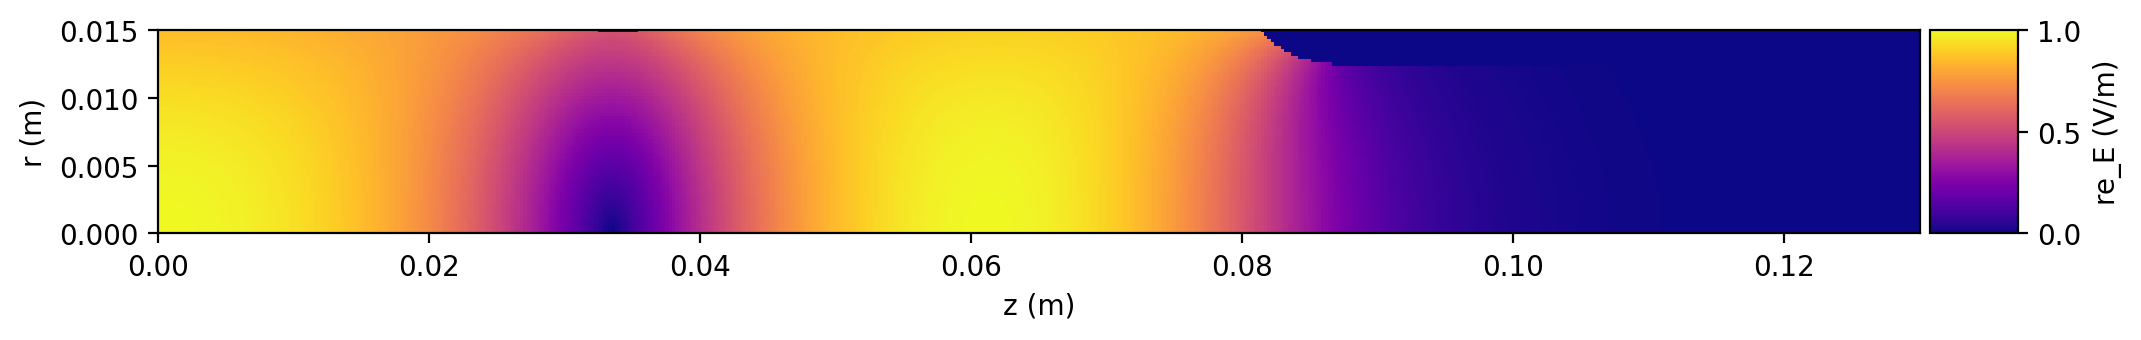

In [17]:
FM = FieldMesh('../data/rfgun.h5')
FM.plot('re_E', aspect='equal', figsize=(12,4))

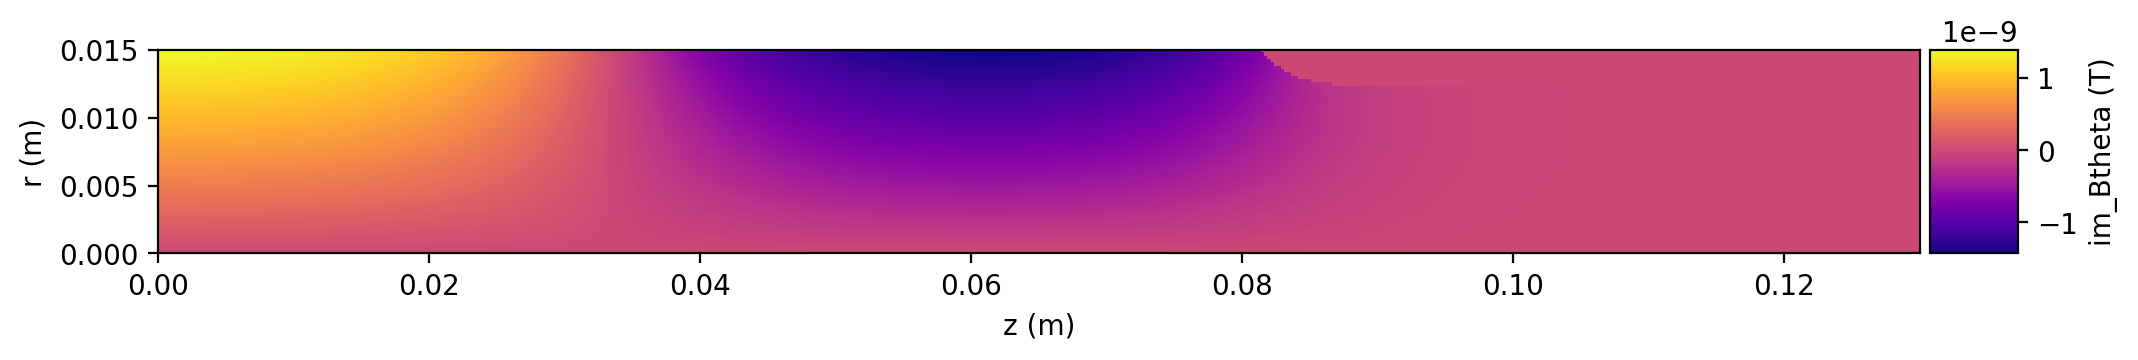

In [18]:
# The magnetic field is out of phase, so use the im_ syntax
FM.plot('im_Btheta', aspect='equal', figsize=(12,4))

In [19]:
# Max on-axis field
np.abs(FM.Ez[0,0,:]).max()

1.0

## Verify the oscillation

Complex fields oscillate as $e^{-i\omega t}$. For TM fields, the spatial components $E_z$ and $B_\theta$ near the axis 

$\Re E_{z} = -\frac{r}{2}\frac{\omega}{c^2} \Im B_\theta$


Text(0.5, 1.0, 'Complex field oscillation')

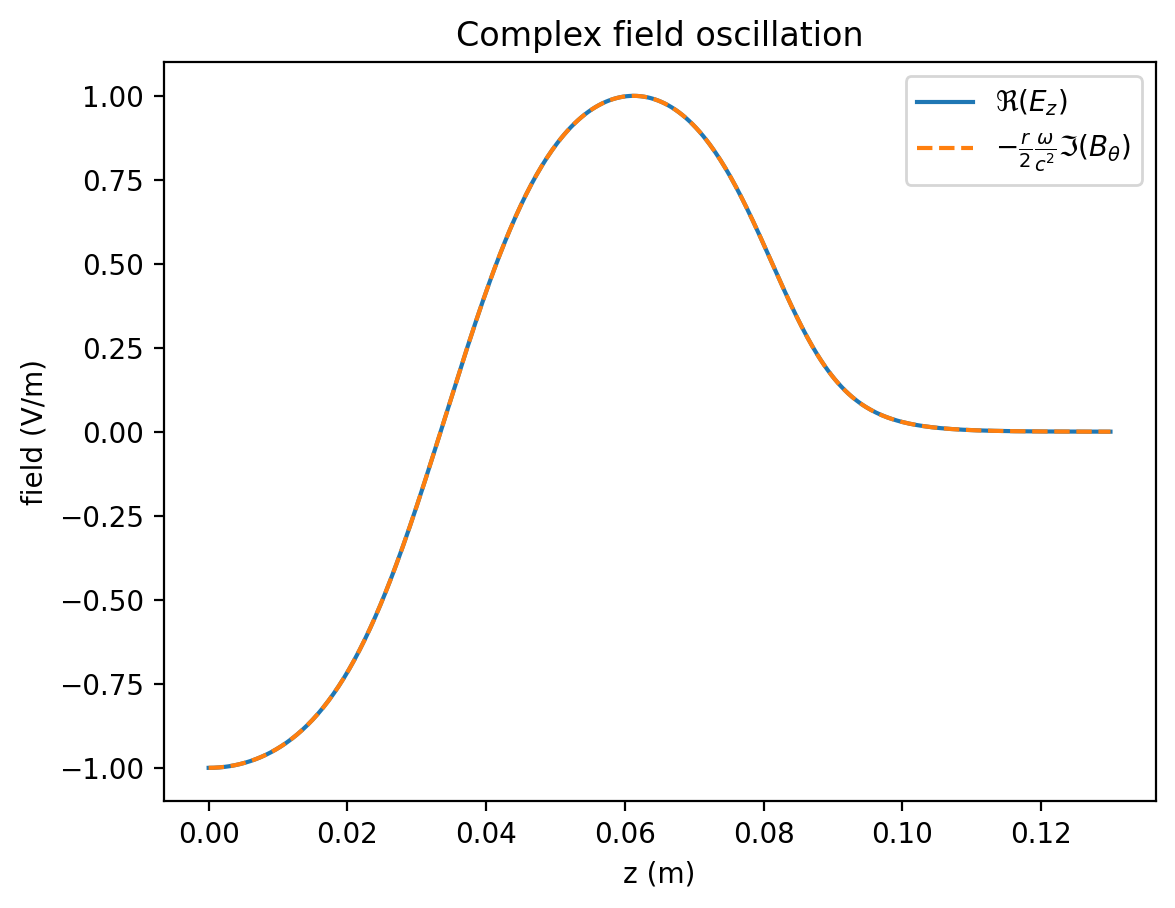

In [20]:
c_light = 299792458.

dr = FM.dr
omega = FM.frequency*2*np.pi

# Check the first off-axis grid points
z0 = FM.z
Ez0 = np.real(FM.Ez[0,0,:])
B1 = -np.imag(FM.Btheta[1,0,:])

plt.plot(z0, Ez0, label=r'$\Re \left( E_z\right)$')
plt.plot(z0, B1*2/dr *c_light**2/omega, '--', label=r'$-\frac{r}{2}\frac{\omega}{c^2} \Im\left(B_\theta\right)$')
plt.ylabel('field (V/m)')
plt.xlabel('z (m)')
plt.legend()
plt.title(r'Complex field oscillation')

# Units

In [21]:
FM.units('Bz')

pmd_unit('T', 1, (0, 1, -2, -1, 0, 0, 0))

In [22]:
# This also works
FM.units('abs_Ez')

pmd_unit('V/m', 1, (1, 1, -3, -1, 0, 0, 0))

# Write

In [23]:
# write openPMD
FM.write('rfgun2.h5')

In [24]:
# Read back. 
FM2 = FieldMesh('rfgun2.h5')

assert FM == FM2

In [25]:
# Write to open HDF5 file. Test reload
import h5py
with h5py.File('test.h5', 'w') as h5:
    FM.write(h5, name='myfield')
    FM2 = FieldMesh(h5=h5['myfield'])
    assert FM == FM2

## Write Impact-T 

Impact-T uses a particular Fourier representation for 1D fields. These routines form this data.

In [26]:
idata = FM.to_impact_solrf()
idata.keys()

dict_keys(['line', 'rfdata', 'ele', 'fmap'])

In [27]:
# This is an element that can be used with LUME-Impact
idata['ele']

{'L': 0.13,
 'type': 'solrf',
 'zedge': 0,
 'rf_field_scale': 1,
 'rf_frequency': 2855998506.158,
 'theta0_deg': 0.0,
 'filename': 'rfdata666',
 'radius': 0.15,
 'x_offset': 0,
 'y_offset': 0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0,
 'name': 'solrf_666',
 's': 0.13}

In [28]:
# This is a line that would be used 
idata['line']

'0.13 0 0 105 0 1 2855998506.158 0.0 666 0.15 0 0 0 0 0 0 /name:solrf_666'

In [29]:
# Data that would be written to the rfdata999 file
idata['rfdata']

array([ 5.90000000e+01, -1.30000000e-01,  1.30000000e-01,  2.60000000e-01,
        2.38794165e-01, -3.04717859e-01, -3.48767224e-17, -7.49524991e-01,
        7.34990291e-18, -2.59757413e-01, -1.91263029e-17,  1.27535902e-01,
       -7.88825639e-17,  4.49651550e-02, -1.52641937e-16,  4.67567146e-03,
       -1.79477883e-16,  3.32025307e-02,  3.77691163e-17, -2.74904837e-03,
        1.83028818e-16, -1.55710320e-02, -1.29477368e-16,  2.64475111e-03,
       -1.30673091e-16,  9.51814907e-04,  2.69769818e-16, -2.68547441e-03,
        3.87179718e-16,  1.50824509e-03,  3.35218145e-16,  7.16574075e-04,
        1.56512075e-16, -9.25573616e-04, -1.49985377e-16,  2.40084183e-04,
       -1.24390515e-16,  2.61495768e-04,  1.92067428e-16, -2.41687337e-04,
       -1.14678516e-17,  6.22859548e-05, -3.07532263e-16,  7.85163760e-05,
       -2.71403798e-16, -8.56926328e-05, -2.60609007e-16,  2.38418521e-06,
       -2.89047582e-16,  2.84696849e-05, -1.83400602e-16, -2.10693774e-05,
       -2.30844314e-17,  

In [30]:
# this is the fieldmap that makes that data
fmap = idata['fmap']
fmap.keys()

dict_keys(['info', 'data', 'field'])

In [31]:
# Additional info
fmap['info']

{'format': 'solrf',
 'Ez_scale': 1.0,
 'Ez_err': 7.685886302960574e-08,
 'Bz_scale': 0.0,
 'Bz_err': 0,
 'zmin': -0.13,
 'zmax': 0.13}

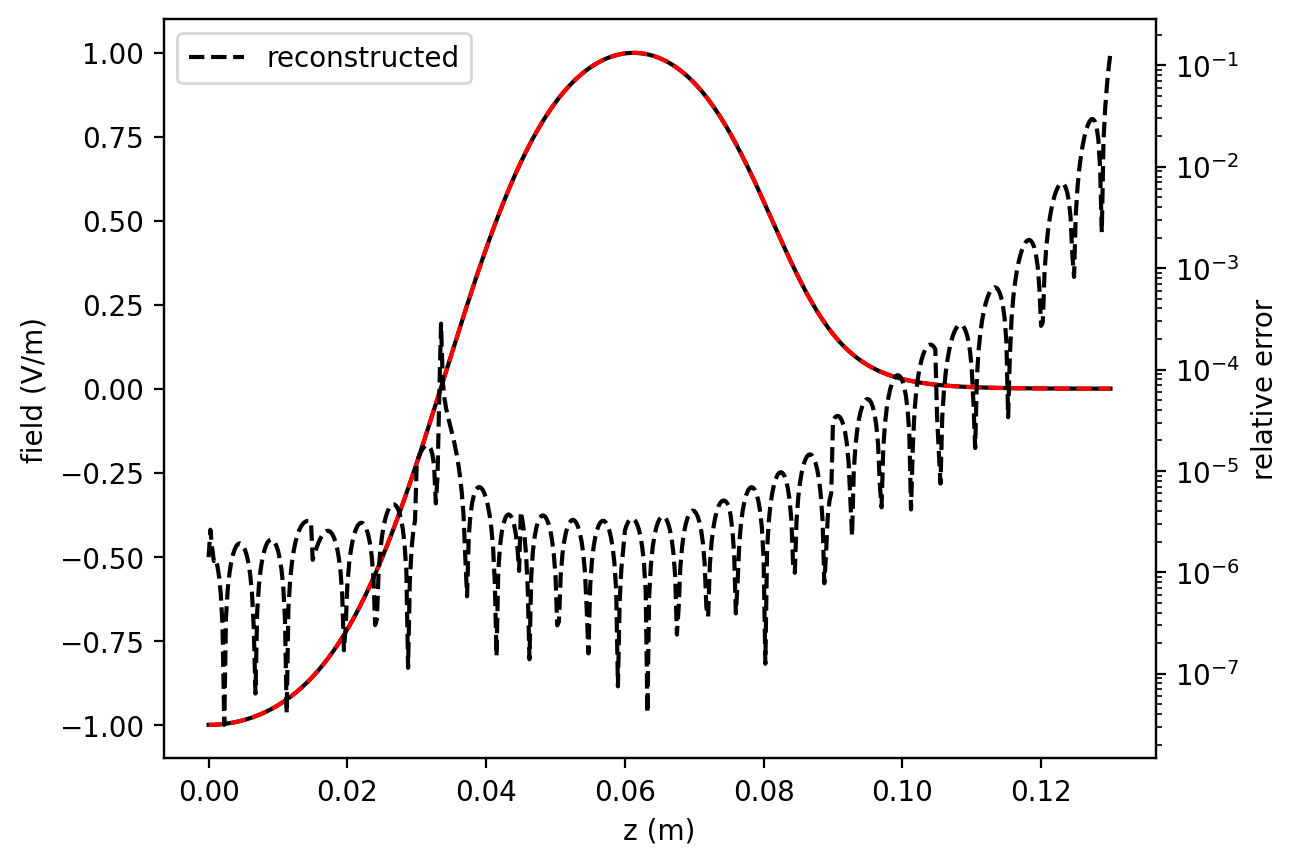

In [32]:
from pmd_beamphysics.interfaces.impact import fourier_field_reconsruction
L = z0.ptp()
zlist = np.linspace(0, L, len(Ez0))
fcoefs = fmap['field']['Ez']['fourier_coefficients']
reconstructed_Ez0 = np.array([fourier_field_reconsruction(z, fcoefs, z0=-L, zlen = 2*L) for z in zlist])

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(z0, Ez0, label=r'$\Re \left( E_z\right)$', color='black')
ax.plot(zlist, reconstructed_Ez0, '--',  label='reconstructed', color='red', )
ax2.plot(zlist, abs(reconstructed_Ez0/Ez0 -1), '--',  label='reconstructed', color='black' )
ax2.set_ylabel('relative error')
ax2.set_yscale('log')
ax.set_ylabel('field (V/m)')
ax.set_xlabel('z (m)')
plt.legend()

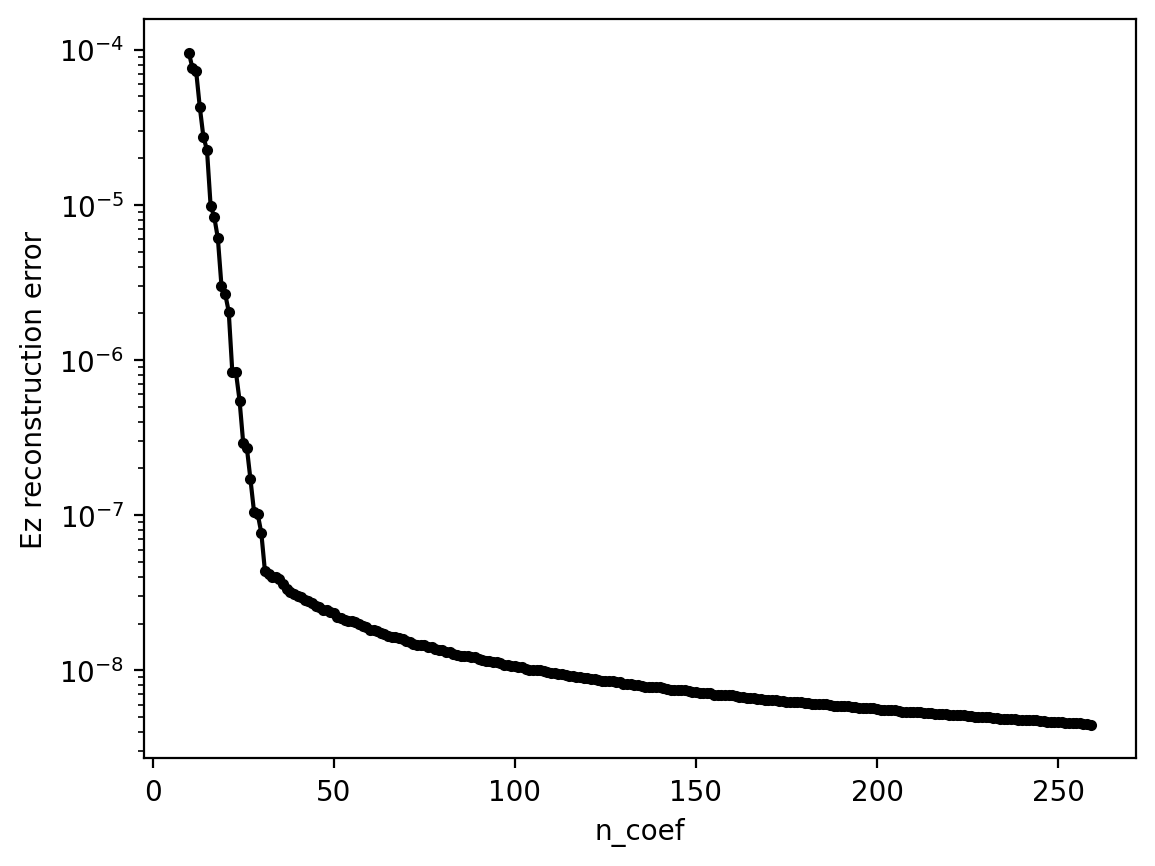

In [33]:
# This function can also be used to study the reconstruction error as a function of the number of coefficients
ncoefs = np.arange(10, FM2.shape[2]//2)
errs = np.array([FM2.to_impact_solrf(n_coef = n, zmirror=True)['fmap']['info']['Ez_err'] for n in ncoefs])

fig, ax = plt.subplots()
ax.plot(ncoefs, errs, marker='.', color='black')
ax.set_xlabel('n_coef')
ax.set_ylabel('Ez reconstruction error')
ax.set_yscale('log')

## Write GPT

In [34]:
#FM.write_gpt('solenoid.gdf', asci2gdf_bin='$ASCI2GDF_BIN', verbose=True)
FM.write_gpt('rfgun_for_gpt.txt', verbose=True)

ASCII field data written. Convert to GDF using: asci2df -o field.gdf rfgun_for_gpt.txt


'rfgun_for_gpt.txt'

In [35]:
FM.write_superfish('rfgun2.t7')

'rfgun2.t7'

# Read Superfish

Proper Superfish T7 can also be read.

In [36]:
FM3 = FieldMesh.from_superfish('rfgun2.t7')
FM3

<FieldMesh with cylindrical geometry and (61, 1, 521) shape at 0x7f83eabf8250>

In [37]:
?FieldMesh.from_superfish

In [38]:
# Note that writing the ASCII and conversions alter the data slightly
FM == FM3

False

In [39]:
# But the data are all close
for c in FM.components:
    close = np.allclose(FM.components[c], FM3.components[c])
    equal = np.all(FM.components[c] == FM3.components[c])
    print(c, equal, close)

electricField/z False True
electricField/r False True
magneticField/theta False True


In [40]:
# Cleanup
import os
for file in ('test.h5',
             'rfgun_for_gpt.txt',
             'rfgun2.h5',
             'rfgun2.t7'):
    os.remove(file)
